In [94]:
import pandas as pd

In [95]:
data = pd.read_csv('./data/steam_reviews.csv')

data.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [96]:
data.shape

(434891, 8)

In [97]:
data['title'].unique().shape

(48,)

In [98]:
# Reviews pro Spiel
data['title'].value_counts()

PLAYERUNKNOWN'S BATTLEGROUNDS                    145685
Grand Theft Auto V                                99956
Rust                                              71088
Rocket League®                                    67907
Dead by Daylight                                  22221
MONSTER HUNTER: WORLD                             18412
ASTRONEER                                          2661
The Elder Scrolls V: Skyrim Special Edition        1473
RESIDENT EVIL 2 / BIOHAZARD RE:2                   1385
Sid Meier’s Civilization® VI                        522
Euro Truck Simulator 2                              501
Terraria                                            260
Slay the Spire                                      260
Subnautica                                          247
Left 4 Dead 2                                       221
Insurgency: Sandstorm                               220
RimWorld                                            204
Garry's Mod                                     

In [99]:
data['review length'] = data['review'].str.len()

In [100]:
print(data['review length'].min())
print(data['review length'].max())

1.0
31949.0


In [102]:
data.loc[data['review length'] > 150.0]['title'].value_counts()

PLAYERUNKNOWN'S BATTLEGROUNDS                    46817
Grand Theft Auto V                               30970
Rust                                             24261
Rocket League®                                   15703
Dead by Daylight                                  8603
MONSTER HUNTER: WORLD                             8290
ASTRONEER                                         1436
The Elder Scrolls V: Skyrim Special Edition        787
RESIDENT EVIL 2 / BIOHAZARD RE:2                   594
Sid Meier’s Civilization® VI                       320
Euro Truck Simulator 2                             163
Subnautica                                         131
ARK: Survival Evolved                              130
Terraria                                            97
Stardew Valley                                      94
Slay the Spire                                      90
Insurgency: Sandstorm                               89
Divinity: Original Sin 2 - Definitive Edition       75
RimWorld  

## Nur Reviews > 150 characters

In [103]:
data_temp = data.loc[data['review length'] > 150.0]

In [104]:
data_temp['recommendation'].value_counts()

Recommended        82300
Not Recommended    56927
Name: recommendation, dtype: int64

In [105]:
# Keine Nulls in allen Spalten
data_temp.isnull().sum()

date_posted               0
funny                     0
helpful                   0
hour_played               0
is_early_access_review    0
recommendation            0
review                    0
title                     0
review length             0
dtype: int64

In [106]:
data_temp.describe()
# Es scheint das es Reviews gibt die 4'294'967'000 Funny Reactions. 

,funny,helpful,hour_played,review length
count,1.392270e+05,139227.000000,139227.000000,139227.000000
mean,7.712172e+05,2.336063,363.567275,575.551007
std,5.754806e+07,102.545151,541.811240,711.451273
min,0.000000e+00,0.000000,0.000000,151.000000
25%,0.000000e+00,0.000000,64.000000,220.000000
50%,0.000000e+00,0.000000,191.000000,345.000000
75%,0.000000e+00,0.000000,451.000000,631.000000
max,4.294967e+09,28171.000000,22393.000000,31949.000000


In [107]:
data_temp[data_temp['funny'] > 10000]['funny'].count()
# 25 Stück

25

Insgesamt gibt es 25 davon. Sehr wahrscheinlich sind das nicht korrekte Werte.

In [108]:
def fix_funny(count):
    if(count > 100000):
        return 0
    else:
        return count

In [109]:
data_temp['funny'] = data_temp['funny'].apply(fix_funny)

C:\Users\ikee9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
data_temp['funny'].describe()

count    139227.000000
mean          0.540908
std          25.867791
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7472.000000
Name: funny, dtype: float64

In [111]:
# Early Accevss
data_temp['is_early_access_review'].value_counts()

False    97028
True     42199
Name: is_early_access_review, dtype: int64

In [112]:
data_temp['recommendation'].value_counts()

Recommended        82300
Not Recommended    56927
Name: recommendation, dtype: int64

In [113]:
data_temp['review length'].describe()

count    139227.000000
mean        575.551007
std         711.451273
min         151.000000
25%         220.000000
50%         345.000000
75%         631.000000
max       31949.000000
Name: review length, dtype: float64

## Reviews Analyse

In [114]:
games_reviewed = data_temp.groupby('title').count()

In [115]:
games_reviewed = games_reviewed[['date_posted']]

In [116]:
games_reviewed.columns = ['review_count']

In [117]:
games_reviewed.head()

,review_count
title,
ACE COMBAT™ 7: SKIES UNKNOWN,8
ARK: Survival Evolved,130
ASTRONEER,1436
Battlefleet Gothic: Armada 2,8
Beat Saber,6


In [118]:
data_temp.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,review length
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns,195.0
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns,171.0
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight,2094.0
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight,1397.0
5,2016-12-12,4,55,2694,False,Recommended,ENGLISH After playing for more than two years ...,Dead by Daylight,4836.0


In [119]:
data_temp['recommendation'] = data_temp['recommendation'] == 'Recommended'

C:\Users\ikee9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
# Anzahl Recommendation
games_reviewed['recommendation_count'] = data_temp.groupby('title').sum()['recommendation']

In [121]:
# Ratio Recommendation
games_reviewed['recommendation_ratio'] = games_reviewed['recommendation_count']/games_reviewed['review_count']

In [122]:
# Durchschnittliche Anzahl Stunden pro Spiel
games_reviewed['avg_playtime'] = data_temp.groupby('title').sum()['hour_played'] / games_reviewed['review_count']

In [123]:
games_reviewed['reviews_combined'] = data_temp.groupby('title')['review'].apply(lambda x: ' '.join(x))

In [124]:
games_reviewed = games_reviewed.reset_index()

In [125]:
games_reviewed.head()

,title,review_count,recommendation_count,recommendation_ratio,avg_playtime,reviews_combined
0,ACE COMBAT™ 7: SKIES UNKNOWN,8,8.0,1.000000,19.750000,Oh man it's been at least a decade since Ace C...
1,ARK: Survival Evolved,130,25.0,0.192308,1007.007692,Before i start the review THE GAMEPLAY OF THIS...
2,ASTRONEER,1436,1368.0,0.952646,54.400418,i have not played much of this game and i dont...
3,Battlefleet Gothic: Armada 2,8,6.0,0.750000,62.750000,Dear Devs thanks for taking your time and maki...
4,Beat Saber,6,6.0,1.000000,80.500000,When I pull off a really difficult section I g...


## Plots

In [126]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [127]:
def sort_games(by, ascending=False, min_review_count=None):

    if min_review_count == None:
        return games_reviewed.sort_values(by=by, ascending=ascending)
    else:
        return (games_reviewed[games_reviewed['review_count'] >= min_review_count]
                                        .sort_values(by=by, ascending=ascending))

In [128]:
sorted_games = sort_games(by='avg_playtime', ascending = True)

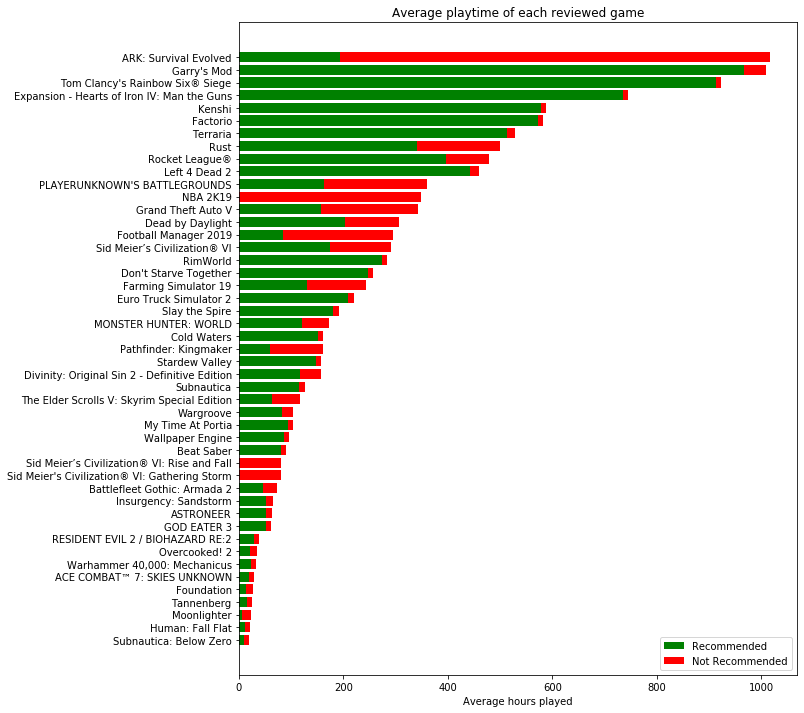

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(10,12)

good_review_heights = (sorted_games['avg_playtime'] * 
                       sorted_games['recommendation_ratio'])
bad_review_heights = sorted_games['avg_playtime'] - good_review_heights

p1 = plt.barh(y=sorted_games['title'], width=good_review_heights, 
              color='green')
p2 = plt.barh(y=sorted_games['title'], width=bad_review_heights, 
              left=good_review_heights, color='red')

plt.title('Average playtime of each reviewed game')
plt.xlabel('Average hours played')
plt.legend([p1, p2], ['Recommended', 'Not Recommended'], loc='lower right')

In [130]:
# Anzahl Reviewers mit 0 Playtime
len(data_temp[data_temp['hour_played'] == 0])

1781

In [131]:
sorted_games2 = sort_games(by='review_count', ascending = True)

Text(0.5, 0, 'Number of reviews')

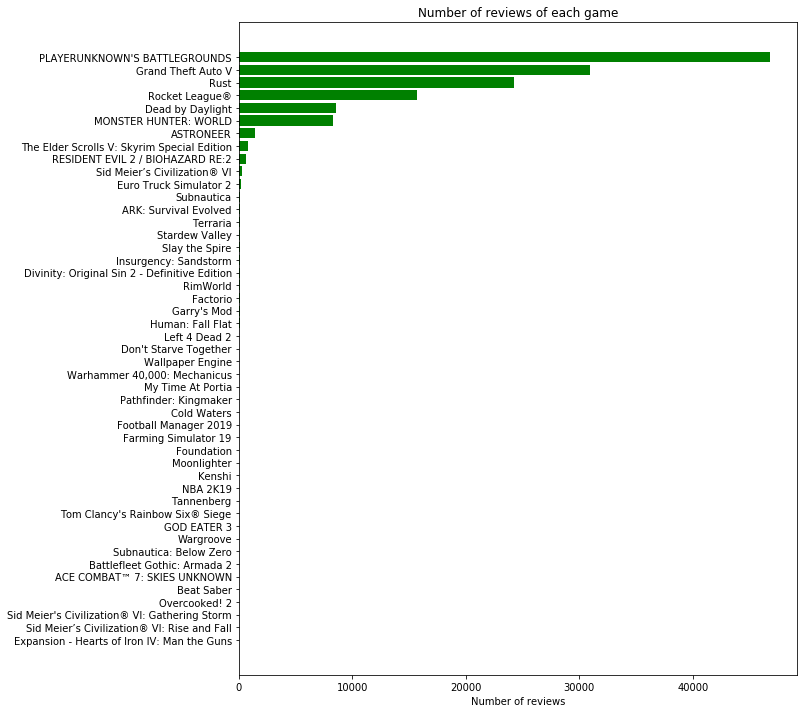

In [139]:
fig, ax = plt.subplots()
fig.set_size_inches(10,12)

plt.barh(y = sorted_games2['title'],width=sorted_games2['review_count'], color = 'green')

plt.title('Number of reviews of each game')
plt.xlabel('Number of reviews')

([<matplotlib.axis.XTick at 0x186acd98ac8>,
 <a list of 2 Text xticklabel objects>)

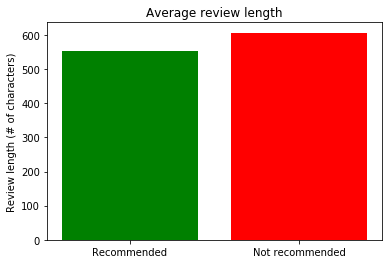

In [133]:
# Average review lengths
recommended = data_temp[data_temp['recommendation']]
not_recommended = data_temp[~data_temp['recommendation']]

plt.bar(x=0, height=recommended['review length'].mean(), color='green')
plt.bar(x=1, height=not_recommended['review length'].mean(), color='red')
plt.title('Average review length')
plt.ylabel('Review length (# of characters)')
plt.xticks(ticks=[0, 1], labels=['Recommended', 'Not recommended'])

In [134]:
# Recommended durchschnittliche Länge
recommended['review length'].mean()

554.1981409477521

In [135]:
# Not recommended durchschnittliche Länge
not_recommended['review length'].mean()

606.4210831415672

In [136]:
games_reviewed.loc[games_reviewed['review_count'] < 10].head(100)

,title,review_count,recommendation_count,recommendation_ratio,avg_playtime,reviews_combined
0,ACE COMBAT™ 7: SKIES UNKNOWN,8,8.0,1.000000,19.750000,Oh man it's been at least a decade since Ace C...
3,Battlefleet Gothic: Armada 2,8,6.0,0.750000,62.750000,Dear Devs thanks for taking your time and maki...
4,Beat Saber,6,6.0,1.000000,80.500000,When I pull off a really difficult section I g...
10,Expansion - Hearts of Iron IV: Man the Guns,2,2.0,1.000000,735.000000,&gt Played as German Reich&gt Declare war on B...
12,Farming Simulator 19,9,5.0,0.555556,234.000000,After playing for just a couple hours I alread...
14,Foundation,9,7.0,0.777778,17.777778,Wow! I have been wanting a good Medieval town ...
15,GOD EATER 3,8,8.0,1.000000,51.125000,Were you a fan of the previous God Eater title...
20,Kenshi,9,9.0,1.000000,577.777778,Lost a leg bled out crawling through the deser...
23,Moonlighter,9,4.0,0.444444,14.000000,I won't tell you if you'll like it or not. I'l...
25,NBA 2K19,9,0.0,0.000000,339.333333,Money grubbing game designers don't know the d...


## Save

In [137]:
# data_temp.to_csv('./data/steam_review_cleaned.csv')

In [138]:
games_reviewed.to_csv('./data/steam_game_reviews.csv')